# Random walk

## squared lattice

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
def rw(n,size):
    pos_x, pos_y = [0],[0]
    plt.plot([-size,size,size,-size,-size],[-size,-size,size,size,-size],c="blue")
    for i in range(n):
        t = np.random.uniform(0,1)
        if t <= 0.25:
            pos_x.append(pos_x[-1]+1)
            pos_y.append(pos_y[-1])
            if pos_x[-1] > size:
                pos_x[-1] = pos_x[-1]-2
        elif t > 0.25 and t <= 0.5:
            pos_x.append(pos_x[-1]-1)
            pos_y.append(pos_y[-1])
            if pos_x[-1] < -size:
                pos_x[-1] = pos_x[-1]+2
        elif t > 0.5 and t <= 0.75:
            pos_x.append(pos_x[-1])
            pos_y.append(pos_y[-1]+1)
            if pos_y[-1] > size:
                pos_y[-1] = pos_y[-1]-2
        elif t > 0.75:
            pos_x.append(pos_x[-1])
            pos_y.append(pos_y[-1]-1)
            if pos_y[-1] < -size:
                pos_y[-1] = pos_y[-1]+2
        plt.plot(pos_x,pos_y,c="r")
        plt.savefig("png/{}.png".format(i))
    
    #plt.plot([-size,size,size,-size,-size],[-size,-size,size,size,-size])
    plt.show()

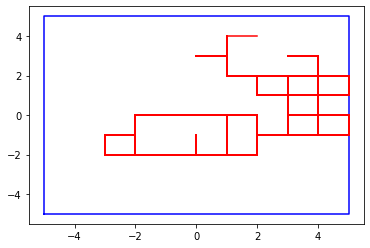

In [4]:
rw(100,5)

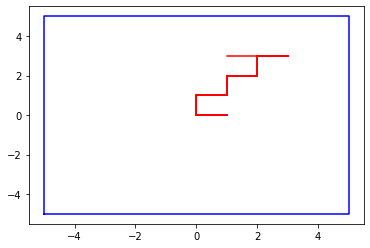

In [3]:
rw(10,5)

In [5]:
import matplotlib.pyplot as plt
import imageio
import glob

def giff(folder,gifname):
    frames = []
    for t in range(len(glob.glob(folder + '/*.png'))):
        image = imageio.v2.imread(folder+"/{}.png".format(t))
        frames.append(image)
    imageio.mimsave('./{}.gif'.format(gifname),
            frames,          
            duration = 2) 

In [6]:
giff('png',"test")

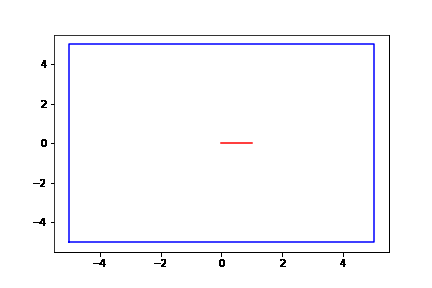

In [48]:
from IPython.display import Image
Image(filename="test.gif")

## Pearson walk

In [14]:
def pearsonwalk(N,a,plot=None):
    x_pos,y_pos= [0],[0]
    A = 0
    B = 0
    for i in range(N):
        y = np.random.uniform(-a,a)
        x = (a**2-y**2)**.5 * random.choice([-1,1])
        x_pos.append(x_pos[-1]+x)
        y_pos.append(y_pos[-1]+y)
        if x_pos[-1] > 0:
            A += 1
            if y_pos[-1] >0:
                B +=1 
    if plot:
        plt.figure(figsize=(8,8))
        plt.plot(x_pos,y_pos)
        plt.show()
    return A/N, B/N #,x_pos,y_pos

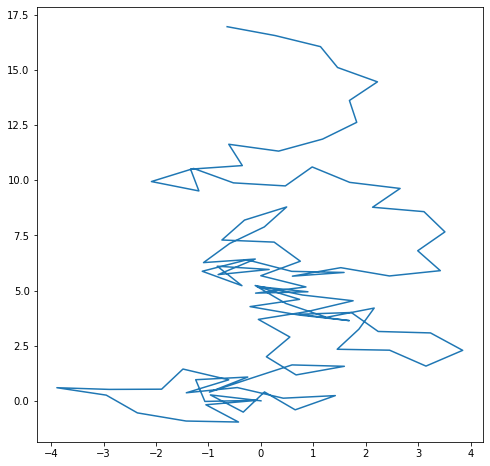

In [12]:
z =pearsonwalk(100,1,True)
z = z[2:]

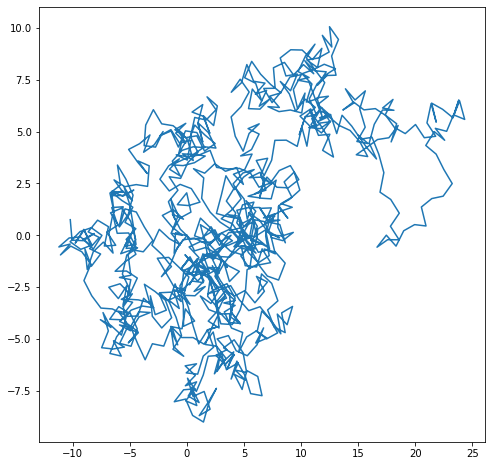

(0.696, 0.39)

In [15]:
pearsonwalk(1000,1,True)

In [16]:
def testing(n):
    An = []
    Bn = []
    for i in range(n):
        a = pearsonwalk(1000,1)
        An.append(a[0])
        Bn.append(a[1])
    return An, Bn

In [17]:
res = testing(1000)

### A_n - the fraction of time steps when the walker is in right half plane
### B_n - the fraction of time the walker is in the first quadrant 

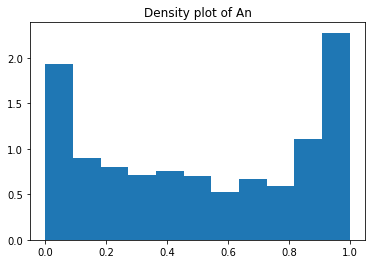

In [18]:
plt.hist(res[0],density=True,bins="auto")
plt.title("Density plot of An")
plt.show()

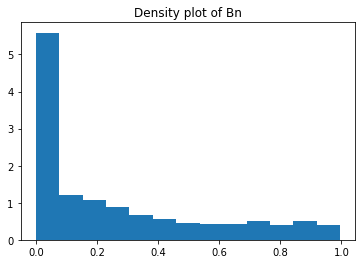

In [19]:
plt.hist(res[1],bins="auto",density=True)
plt.title("Density plot of Bn")
plt.show()

In [20]:
np.mean(res[0])

0.5132059999999999

In [21]:
np.mean(res[1])

0.25912899999999994

## random walk on graph

In [23]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom,norm

def randomGraph(n, p):
    g = nx.Graph()
    for i in range(n):
        g.add_node(i)
        for j in range(i+1, n):
            if random.random() < p:
                g.add_edge(i, j)
    return g

In [24]:
G = randomGraph(20,0.2)

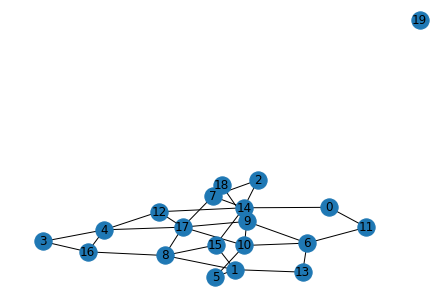

In [25]:
nx.draw(G,with_labels=True)

In [26]:
def graph_random_walk(G,node,steps,plot=None):
    """
        G - graph
        node - starting node
    """
    path = [node]
    np.random.seed(42)
    pos = nx.kamada_kawai_layout(G)
    if plot:
        nx.draw_networkx(G, pos=pos, font_size=16, node_color='blue', font_color='white')
        nx.draw_networkx(G.subgraph(node), pos=pos, font_size=16, node_color='red', font_color='green')
    for i in range(steps):
        neigh = list(G.neighbors(path[-1]))
        next_move = random.choice(neigh)
        path.append(next_move)
        if plot:
            nx.draw_networkx(G, pos=pos, font_size=16, node_color='blue', font_color='white')
            nx.draw_networkx(G.subgraph(path[-1]), pos=pos, font_size=16, node_color='red', font_color='green')  
            plt.savefig("png2/{}.png".format(i))
    return path

[3, 16, 4, 12, 14, 0, 11, 6, 10, 5, 1, 5, 10, 9, 17, 4, 12, 17, 7, 18, 9]

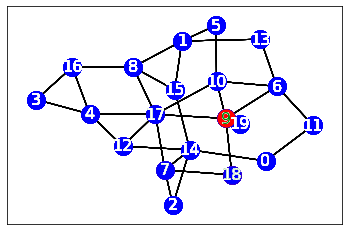

In [27]:
graph_random_walk(G,3,20,True)

In [31]:
def giff(folder,gifname):
    frames = []
    for t in range(len(glob.glob(folder + '/*.png'))):
        image = imageio.v2.imread(folder+"/{}.png".format(t))
        frames.append(image)
    imageio.mimsave('./{}.gif'.format(gifname),
            frames,          
            duration = 200,
                   loop=2) 

In [32]:
giff("png2","graph_rw")

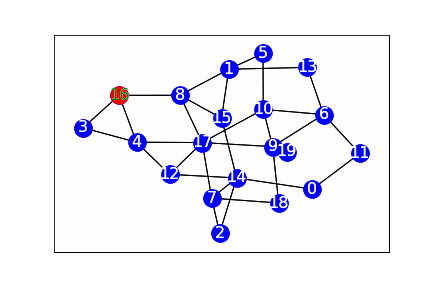

In [33]:
from IPython.display import Image
Image(filename="graph_rw.gif")

#### given origin node will estimate average hitting times of all other nodes

In [60]:
def hitting_time(G,origin_node):
    all_nodes = list(G.nodes)
    N = len(all_nodes)
    all_nodes.remove(origin_node)
    results = dict()
    for j in range(100):
        path = graph_random_walk(G,origin_node,N*5)
        for i in all_nodes:
            if i in path:
                results.setdefault(i, []).append(path.index(i))
            else:
                results.setdefault(i, []).append(0)
    means = {}
    for key, values in results.items():
        mean = np.mean(values)
        means[key] = mean

    return means
    


In [35]:
hitting_time(G,3)

{0: 32.17,
 11: 37.4,
 14: 22.02,
 1: 27.13,
 5: 30.49,
 8: 14.99,
 13: 31.81,
 15: 24.5,
 2: 32.72,
 7: 23.91,
 4: 8.49,
 16: 6.48,
 12: 19.08,
 17: 12.12,
 10: 26.58,
 6: 31.4,
 9: 23.88,
 18: 36.4,
 19: 0.0}

In [36]:
hitting_time(G,3)

{0: 33.13,
 11: 30.9,
 14: 18.06,
 1: 28.72,
 5: 31.6,
 8: 13.47,
 13: 33.36,
 15: 24.53,
 2: 31.13,
 7: 24.2,
 4: 7.81,
 16: 10.14,
 12: 17.11,
 17: 8.69,
 10: 23.04,
 6: 25.28,
 9: 21.36,
 18: 30.14,
 19: 0.0}

In [56]:
a = hitting_time(G,3)

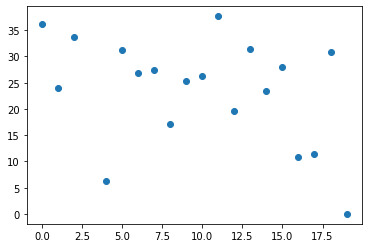

In [57]:
plt.scatter(list(a.keys()),list(a.values()))

In [61]:
G2 = randomGraph(100,0.2)
a = hitting_time(G2,3)

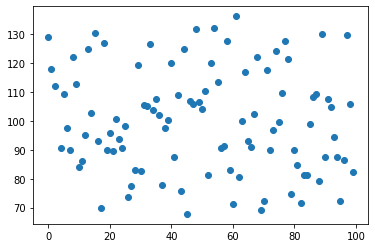

In [62]:
plt.scatter(list(a.keys()),list(a.values()))
plt.show()

In [63]:
G3 = nx.watts_strogatz_graph(100,4,0.0)

In [66]:
a = hitting_time(G3,3)

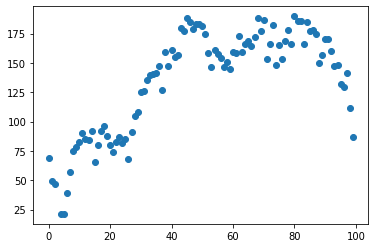

In [67]:
plt.scatter(list(a.keys()),list(a.values()))
plt.show()